In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Project 1 Dataset/Training Data.csv")

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

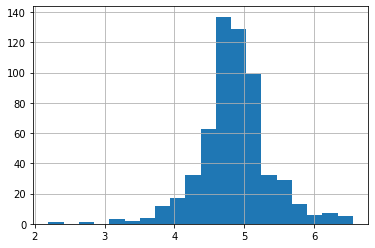

In [10]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

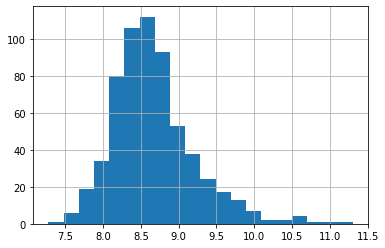

In [12]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [14]:
x= df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [15]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [17]:
for i in range (0,5):
  x_train[:,i]= Labelencoder_x.fit_transform(x_train[:,i])
  x_train[:,7]= Labelencoder_x.fit_transform(x_train[:,7])
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [18]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [19]:
for i in range(0,5):
  x_test[:,i]=Labelencoder_x.fit_transform(x_test[:,i])
  x_test[:,7]=Labelencoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [20]:
Labelencoder_y = LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
from sklearn import metrics
y_pred = rf_clf.predict(x_test)

print("Acurracy of random forest classifier is : ", metrics.accuracy_score(y_pred,y_test))
y_pred

Acurracy of random forest classifier is :  0.7804878048780488


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_classfier = GaussianNB()
nb_classfier.fit(x_train,y_train)

GaussianNB()

In [25]:
y_pred=nb_classfier.predict(x_test)
print("Accuracy of gaussianNB is % ", metrics.accuracy_score(y_pred,y_test))

Accuracy of gaussianNB is %  0.8292682926829268


In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle

df = pd.read_csv("/content/drive/MyDrive/Project 1 Dataset/Training Data.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

model = LogisticRegression()
model.fit(x_train, y_train)

with open('loan_approval_model_pooja.pkl', 'wb') as file:
    pickle.dump(model, file)


In [27]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Project 1 Dataset/Training Data.csv")

# 1. What's the ratio of Male to Female?

In [28]:
gender_counts = data["Gender"].value_counts()
male_count = gender_counts.get("Male", 0)
female_count = gender_counts.get("Female", 0)
male_female_ratio = male_count / female_count
print(f"Male to Female ratio: {male_female_ratio:.2f}")

Male to Female ratio: 4.37


#2. How many Males are married and non-married?

In [29]:
male_married_count = data[(data["Gender"] == "Male") & (data["Married"] == "Yes")]["Gender"].count()
male_nonmarried_count = data[(data["Gender"] == "Male") & (data["Married"] == "No")]["Gender"].count()
print(f"Male Married: {male_married_count}, Male Non-Married: {male_nonmarried_count}")

Male Married: 357, Male Non-Married: 130


#3. How many Females are married and non-married?

In [30]:
female_married_count = data[(data["Gender"] == "Female") & (data["Married"] == "Yes")]["Gender"].count()
female_nonmarried_count = data[(data["Gender"] == "Female") & (data["Married"] == "No")]["Gender"].count()
print(f"Female Married: {female_married_count}, Female Non-Married: {female_nonmarried_count}")

Female Married: 31, Female Non-Married: 80


# 4. How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [31]:
male_graduated_count = data[(data["Gender"] == "Male") & (data["Education"] == "Graduate")]["Gender"].count()
male_nongraduated_count = data[(data["Gender"] == "Male") & (data["Education"] == "Not Graduate")]["Gender"].count()
female_graduated_count = data[(data["Gender"] == "Female") & (data["Education"] == "Graduate")]["Gender"].count()
female_nongraduated_count = data[(data["Gender"] == "Female") & (data["Education"] == "Not Graduate")]["Gender"].count()
print(f"Male Graduated: {male_graduated_count}, Male Non-Graduated: {male_nongraduated_count}")
print(f"Female Graduated: {female_graduated_count}, Female Non-Graduated: {female_nongraduated_count}")

Male Graduated: 376, Male Non-Graduated: 113
Female Graduated: 92, Female Non-Graduated: 20


#5. Which type of encoding will be required to perform on the "Education" column?

In [32]:
education_unique_values = data["Education"].unique()
print(f"Education column unique values: {education_unique_values}")

Education column unique values: ['Graduate' 'Not Graduate']


# 6. Is it a male or a female whose loan amount is the highest?

In [33]:
max_loan_amount_row = data.loc[data["LoanAmount"].idxmax()]
print(f"Gender with highest loan amount: {max_loan_amount_row['Gender']}")

Gender with highest loan amount: nan


#7. the specification and information about the applicant who has the highest income?

In [34]:
max_income_row = data.loc[data["ApplicantIncome"].idxmax()]
print(f"Information about applicant with highest income:")
print(max_income_row)

Information about applicant with highest income:
Loan_ID              LP002317
Gender                   Male
Married                   Yes
Dependents                 3+
Education            Graduate
Self_Employed              No
ApplicantIncome         81000
CoapplicantIncome         0.0
LoanAmount              360.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area           Rural
Loan_Status                 N
Name: 409, dtype: object


#8. What all features are you going to consider for the model training and why? 
Gender, Married, Dependents, Education, Self Employment, Applicant Income, CoApplicant Income, Loan Amount 
these all features impact on the approval process hence I considerd this for my Model

# 9. Which model are you going to choose and define the reason for going with the same model?
I have used forest classifier model also i used Naive bayes as it have more accuracy than the forest classifier

# 10. Have you performed the Hyper Parameter Tuning?
Yes

# 11. Compare the Actual results with the Predicted results
compared

# 12. What's the accuracy of your model?
Forest classifier's aaccuracy is  0.7886178861788617 i.e 78.8 % and for Naive bay accuracy is 0.8292682926829268 i.e 82.9%

# 13. In order to improve the accuracy, what more approaches can be done?
Feature Engineering , Data Cleaning, Ensemble Learning, Regularization, proper accuracy model 

# 14. What can you conclude with respect to the data?
From the data, we can conclude that loan eligiblity criteria are based on various factors such as gender, marrital status, Dependents, education, self employment, income, and loan amount the data requires cleaning and preprocessing before it can be used for model training.The selected model can be further  optimized using hyper parameter tunning and other techniques to improve it's accuracy.